In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from pylab import rcParams
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Setting plot parameters

In [2]:
rcParams['figure.figsize'] = 10, 7
sb.set_style('whitegrid')

### Load the diabetes dataset

In [3]:
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

## Viewing the dataset

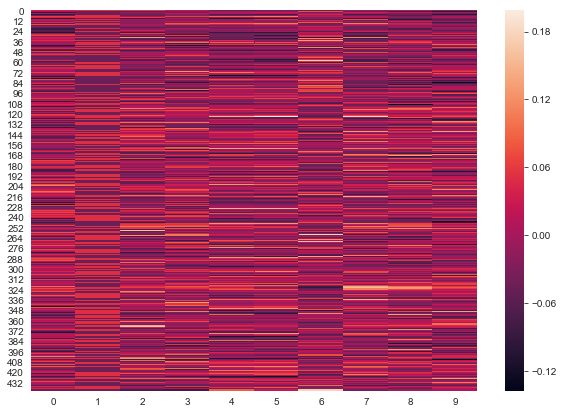

In [4]:
sb.heatmap(diabetes.data)

### Use only one feature
Here using only one single feature to carry out regression.

In [5]:
diabetes_X = diabetes.data[:, np.newaxis, 2]

Checking how the feature varies across the index

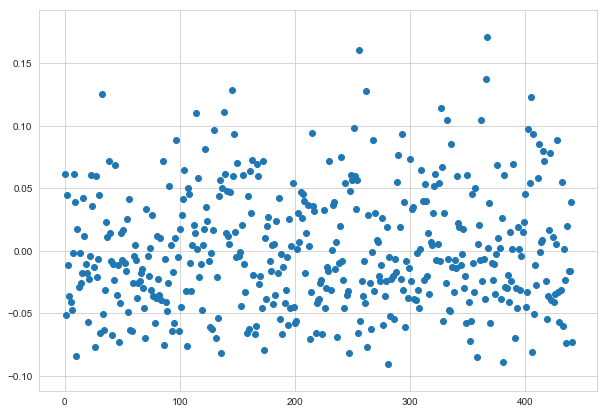

In [6]:
plt.scatter(np.arange(0,diabetes_X.size), diabetes_X)

### Split the data into training/testing sets

In [7]:
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X, diabetes.target, test_size = 0.2, random_state = 42)

### Create linear regression object

In [8]:
regr = linear_model.LinearRegression()

### Train the model using the training sets

In [9]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Make predictions using the testing set

In [10]:
diabetes_y_pred = regr.predict(diabetes_X_test)

### The coefficients

In [11]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [998.57768914]


### The mean squared error

In [12]:
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

Mean squared error: 4061.83


### Explained variance score: 1 is perfect prediction

In [13]:
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Variance score: 0.23


### Plot outputs

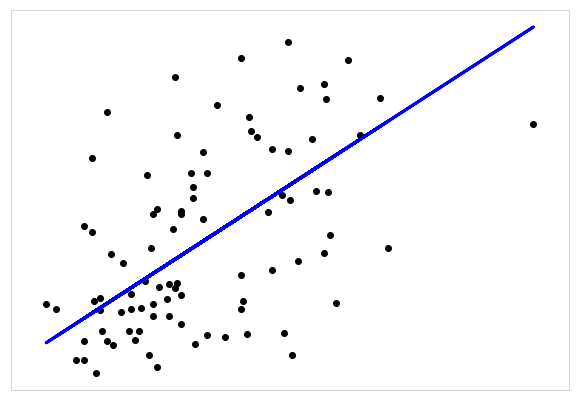

In [14]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()